In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
import re

In [4]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Summary

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
train_df.isnull().sum()/train_df.isnull().count()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [11]:
total = train_df.isnull().sum().sort_values(ascending=False)
precent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = round(precent_1, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


#1. Age and Sex

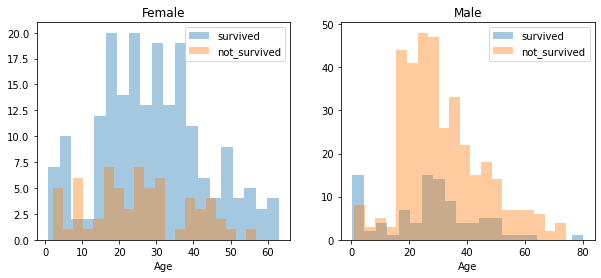

In [12]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

male = train_df[train_df['Sex'] == 'male']
female = train_df[train_df['Sex'] == 'female']

ax = sns.distplot(female[female['Survived']==1]['Age'].dropna(), bins=20,
                  label='survived', ax=axes[0], kde=False)
ax = sns.distplot(female[female['Survived']==0]['Age'].dropna(), bins=20,
                  label='not_survived', ax=axes[0], kde=False)
ax.set_title('Female')
ax.legend()

ax = sns.distplot(male[male['Survived']==1]['Age'].dropna(), bins=20,
                  label='survived', ax=axes[1], kde=False)
ax = sns.distplot(male[male['Survived']==0]['Age'].dropna(), bins=20,
                  label='not_survived', ax=axes[1], kde=False)
ax.set_title('Male')
ax.legend()

#2. Embarked, Pclass and Sex

d:\install\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\install\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\install\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


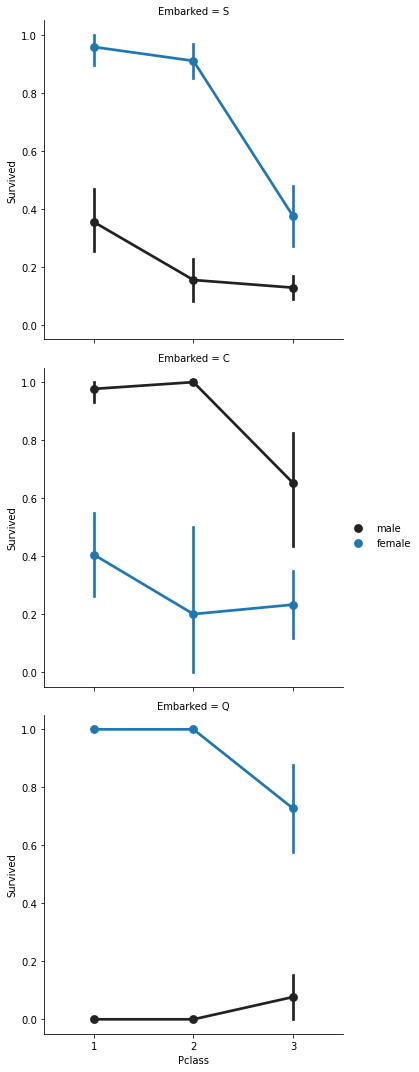

In [13]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=5)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FacetGrid.add_legend()

#3. Pclass

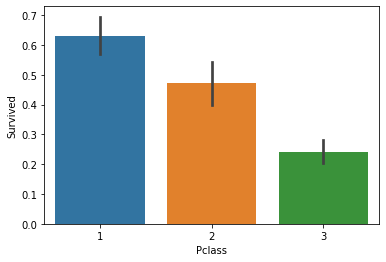

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

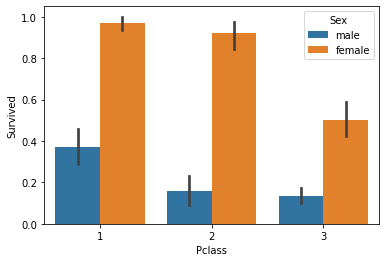

In [15]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)

d:\install\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


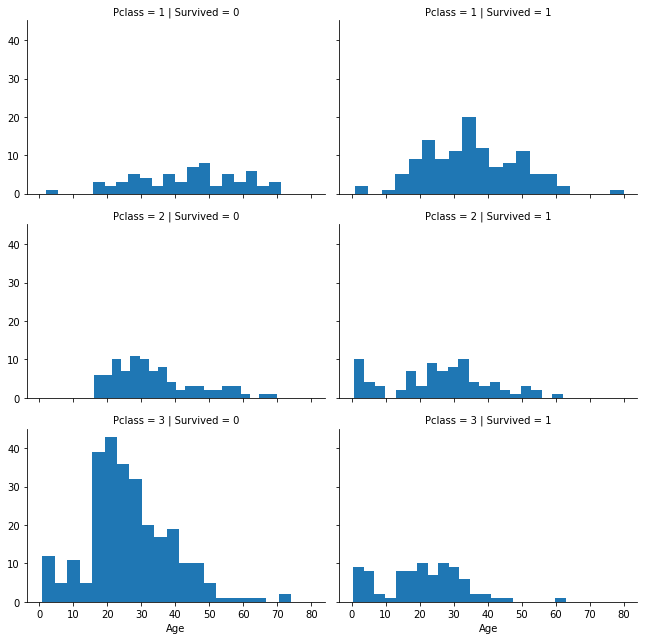

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3, aspect=1.5)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

#4.SibSp and Parch

In [17]:
data= [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(np.int16)

In [18]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

d:\install\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


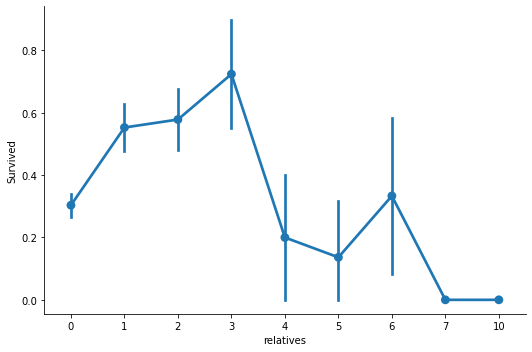

In [19]:
sns.factorplot('relatives', 'Survived', data=train_df, aspect=1.5)

d:\install\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


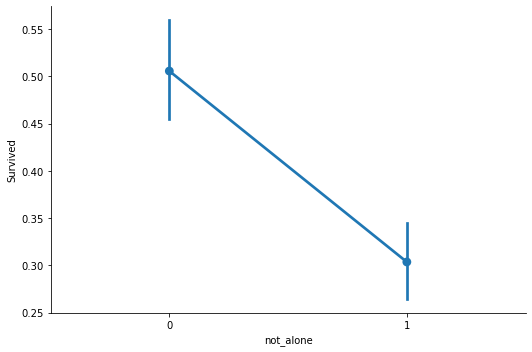

In [20]:
sns.factorplot('not_alone', 'Survived', data=train_df, aspect=1.5)

In [21]:
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

# Missing Data

In [22]:
# Cabin, Embarked, Age and Fare

1. Cabin

In [23]:
deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

2. Age

In [24]:
'''
data = [train_df, test_df]

for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

train_df["Age"].isnull().sum()
'''

'\ndata = [train_df, test_df]\n\nfor dataset in data:\n    mean = train_df[\'Age\'].mean()\n    std = test_df[\'Age\'].std()\n    is_null = dataset[\'Age\'].isnull().sum()\n    \n    # compute random numbers between the mean, std and is_null\n    rand_age = np.random.randint(mean - std, mean + std, size = is_null)\n    \n    # fill NaN values in Age column with random values generated\n    age_slice = dataset["Age"].copy()\n    age_slice[np.isnan(age_slice)] = rand_age\n    dataset["Age"] = age_slice\n    dataset["Age"] = train_df["Age"].astype(int)\n\ntrain_df["Age"].isnull().sum()\n'

In [25]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [26]:
# My way
titles = train_df['Title'].value_counts().index.values

In [27]:
for title in titles:
    train_df.loc[(train_df['Title'] == title) & (train_df['Age'].isna()), 'Age'] = train_df[train_df['Title'] == title]['Age'].mean()
        
    test_df.loc[(test_df['Title'] == title) & (test_df['Age'].isna()), 'Age'] = test_df[test_df['Title'] == title]['Age'].mean()

In [28]:
train_df['Age'].isnull().sum()

0

In [29]:
train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)

3. Embarked

In [30]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [31]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

4. Fare

In [32]:
test_df[test_df['Fare'].isna()] = test_df['Fare'].mean()

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    int32  
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Ticket     891 non-null    object 
 7   Fare       891 non-null    float64
 8   Embarked   891 non-null    object 
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int16  
 11  Deck       891 non-null    int32  
 12  Title      891 non-null    int64  
dtypes: float64(1), int16(1), int32(2), int64(6), object(3)
memory usage: 78.4+ KB


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    float64
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    float64
 4   Parch      418 non-null    float64
 5   Ticket     418 non-null    object 
 6   Fare       418 non-null    float64
 7   Embarked   418 non-null    object 
 8   relatives  418 non-null    float64
 9   not_alone  418 non-null    float64
 10  Deck       418 non-null    float64
 11  Title      418 non-null    float64
dtypes: float64(9), object(3)
memory usage: 39.3+ KB


# Converting types

1. Fare

In [35]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

2. Name

In [36]:
'''
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
'''

'\ndata = [train_df, test_df]\ntitles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}\n\nfor dataset in data:\n    # extract titles\n    dataset[\'Title\'] = dataset.Name.str.extract(\' ([A-Za-z]+)\\.\', expand=False)\n    # replace titles with a more common title or as Rare\n    dataset[\'Title\'] = dataset[\'Title\'].replace([\'Lady\', \'Countess\',\'Capt\', \'Col\',\'Don\', \'Dr\',                                            \'Major\', \'Rev\', \'Sir\', \'Jonkheer\', \'Dona\'], \'Rare\')\n    dataset[\'Title\'] = dataset[\'Title\'].replace(\'Mlle\', \'Miss\')\n    dataset[\'Title\'] = dataset[\'Title\'].replace(\'Ms\', \'Miss\')\n    dataset[\'Title\'] = dataset[\'Title\'].replace(\'Mme\', \'Mrs\')\n    # convert titles into numbers\n    dataset[\'Title\'] = dataset[\'Title\'].map(titles)\n    # filling NaN with 0, to get safe\n    dataset[\'Title\'] = dataset[\'Title\'].fillna(0)\ntrain_df = train_df.drop([\'Name\'], axis=1)\ntest_df = test_df.drop([\'Name\'], axis=1)\n'

3. Sex

In [37]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [38]:
test_df['Sex'] = test_df['Sex'].fillna(0)

4. Ticket

In [39]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

5. Embarked

In [40]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [41]:
test_df['Embarked'] = test_df['Embarked'].fillna(0)

# Creating Categories

In [42]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_df['Age'].value_counts()

4    245
6    149
2    128
5    120
3    106
0     72
1     71
Name: Age, dtype: int64

In [43]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

# Creating new features

In [44]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [45]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


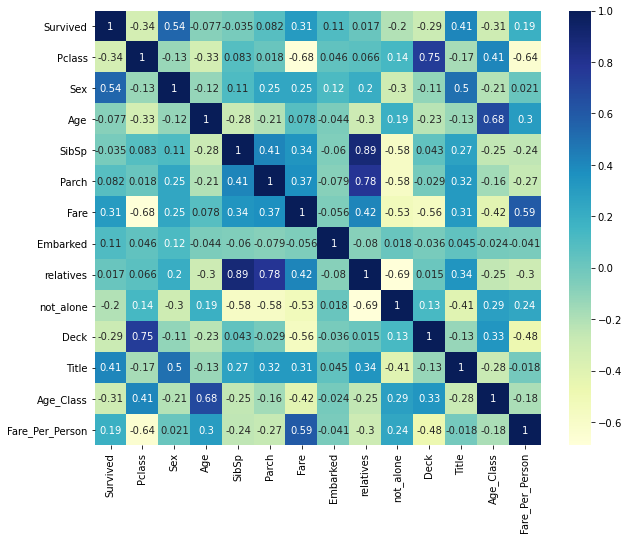

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

In [47]:
test_df.isna().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
relatives          0
not_alone          0
Deck               0
Title              0
Age_Class          0
Fare_Per_Person    0
dtype: int64

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


In [49]:
from scipy import stats

In [51]:
z = np.abs(stats.zscore(train_df))
print(z)

[[0.78927234 0.82737724 0.73769513 ... 0.7075504  0.34312033 0.84054348]
 [1.2669898  1.56610693 1.35557354 ... 1.2352151  0.55963607 0.20837002]
 [1.2669898  0.82737724 1.35557354 ... 0.26383235 0.30642687 0.84054348]
 ...
 [0.78927234 0.82737724 1.35557354 ... 0.26383235 0.34312033 0.84054348]
 [1.2669898  1.56610693 0.73769513 ... 0.7075504  0.99266754 1.25728352]
 [0.78927234 0.82737724 0.73769513 ... 0.7075504  0.95597407 0.84054348]]


In [59]:
threshold = 3
print(np.where(z > 3))

(array([ 13,  13,  16,  25,  25,  30,  50,  59,  59,  68,  68,  71,  71,
        86, 119, 119, 149, 150, 159, 159, 164, 167, 171, 180, 180, 182,
       182, 195, 201, 201, 233, 233, 245, 249, 258, 261, 261, 266, 269,
       278, 306, 317, 324, 324, 325, 337, 339, 360, 373, 380, 386, 386,
       398, 437, 438, 449, 480, 480, 527, 536, 537, 541, 541, 542, 542,
       556, 557, 567, 599, 609, 610, 610, 626, 632, 638, 647, 660, 678,
       678, 683, 683, 686, 694, 708, 716, 730, 736, 737, 745, 759, 766,
       774, 787, 792, 792, 796, 813, 813, 822, 824, 846, 846, 848, 850,
       850, 858, 863, 863, 885, 886], dtype=int64), array([ 5,  8,  4,  5,  8, 11,  4,  4,  8,  4,  8,  4,  8,  5,  4,  8, 11,
       11,  4,  8,  4,  5,  4,  4,  8,  4,  8, 13,  4,  8,  4,  8, 11, 11,
       13,  4,  8,  4, 13,  4, 13, 11,  4,  8, 13, 13, 10,  5, 13, 13,  4,
        8, 11,  5,  5, 11,  4,  8, 13, 11, 13,  4,  8,  4,  8, 11, 13,  5,
       11, 13,  5,  8, 11, 11,  5, 11, 11,  5,  8,  4,  8,  4, 11, 13, 

In [61]:
train_df_o = train_df[(z < 3).all(axis=1)]

In [62]:
train_df_o.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


Using train test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.3, random_state=100)

In [65]:
logreg = LogisticRegression()

In [66]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [67]:
logreg.score(X_test, y_test)

0.8171641791044776

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)

In [69]:
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [70]:
acc_random_forest

92.78

Using K-Fold

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

d:\install\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\install\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Scores: [0.71428571 0.87301587 0.87301587 0.77419355 0.77419355 0.83870968
 0.79032258 0.79032258 0.79032258 0.83870968]
Mean: 0.8057091653865847
Standard Deviation: 0.04721589772901083


In [73]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.6984127  0.77777778 0.84126984 0.80645161 0.91935484 0.83870968
 0.79032258 0.77419355 0.77419355 0.75806452]
Mean: 0.7978750640040962
Standard Deviation: 0.05607287791240141


In [74]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.181
Title,0.173
Age_Class,0.111
Pclass,0.081
Deck,0.081
Age,0.079
Fare,0.068
relatives,0.061
Embarked,0.050


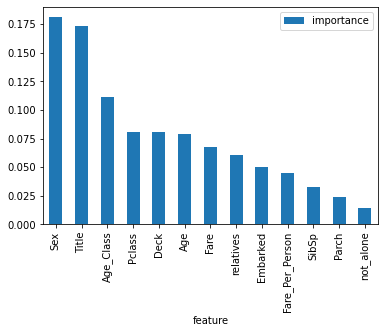

In [75]:
importances.plot.bar()

In [76]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [77]:
# Logistic Regression

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
y_prediction_logreg = log_regression.predict(X_test)

log_regression.score(X_train, y_train)

acc_log_regression = round(log_regression.score(X_train, y_train) * 100, 2)
print(acc_log_regression)

81.86


In [78]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.78 %


# Hyper Parameter Tuning

In [79]:
param_grid = { 
    'criterion' : ['gini', 'entropy'], 
    'min_samples_leaf' : [1, 5, 10, 25, 50, 70], 
    'min_samples_split' : [2, 4, 10, 12, 16, 18, 25, 35], 
    'n_estimators': [100, 400, 700, 1000, 1500]
}

In [80]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [81]:
'''
rf = RandomForestClassifier(n_estimators=100, 
                            max_features='auto', 
                            oob_score=True, 
                            random_state=1, 
                            n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.bestparams
'''

"\nrf = RandomForestClassifier(n_estimators=100, \n                            max_features='auto', \n                            oob_score=True, \n                            random_state=1, \n                            n_jobs=-1)\nclf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)\nclf.fit(X_train, y_train)\nclf.bestparams\n"

In [82]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.69999999999999 %


# Further Evaluation

In [83]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[346,  44],
       [ 73, 160]], dtype=int64)

In [84]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7843137254901961
Recall: 0.6866952789699571


In [85]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7322654462242564

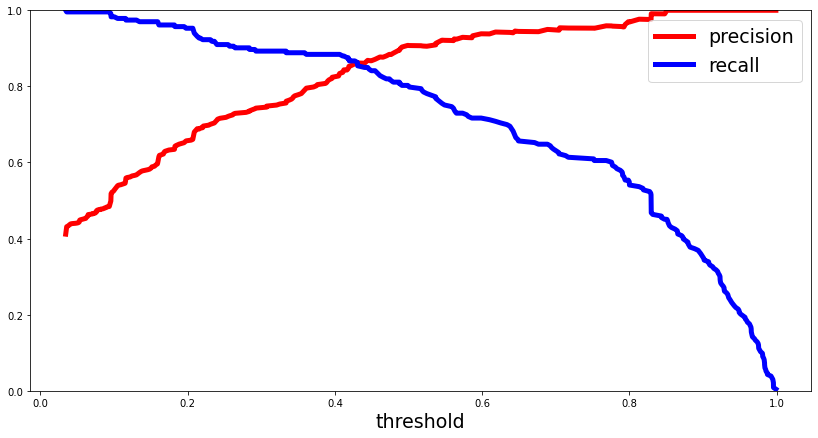

In [86]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

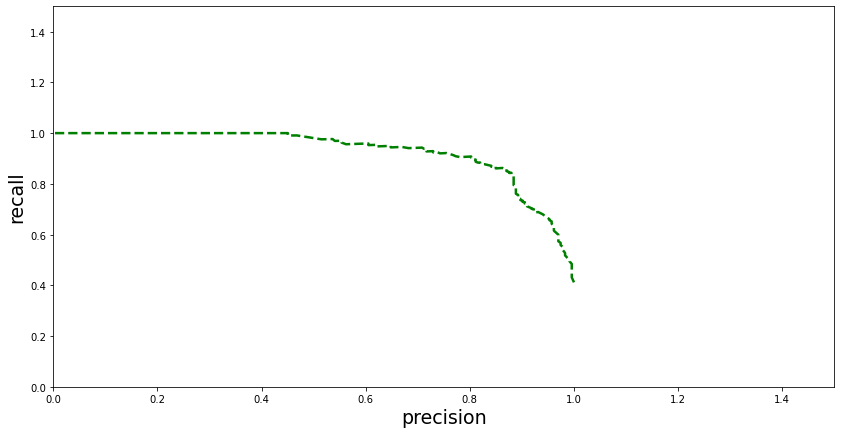

In [87]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

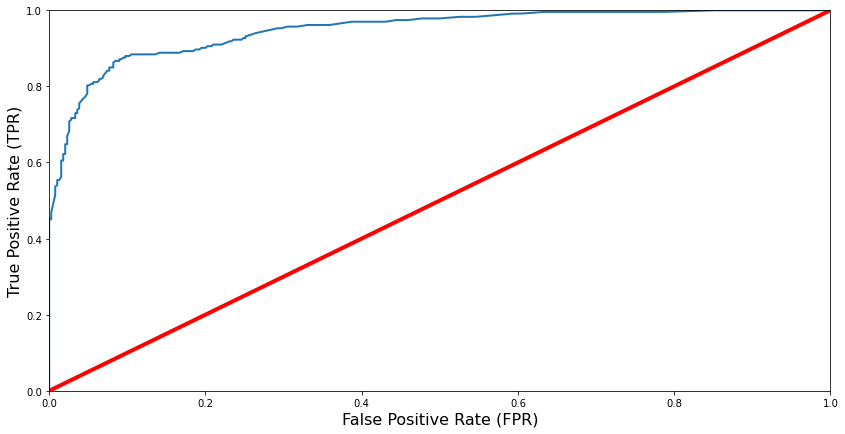

In [88]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.947600968416419


In [90]:
# Method 2 with outliners removed with Z-score

In [ ]:
train_df_o  = train_df_o.drop("not_alone", axis=1)
train_df_o  = train_df_o.drop("Parch", axis=1)

test_df  = test_df.drop("not_alone", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train_df_o.drop('Survived', axis=1), train_df_o['Survived'], test_size=0.3, random_state=100)

In [119]:
# Logistic Regression

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
y_prediction_logreg = log_regression.predict(X_test)

log_regression.score(X_train, y_train)

acc_log_regression = round(log_regression.score(X_train, y_train) * 100, 2)
print(acc_log_regression)

85.46


In [120]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.44 %


In [121]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [122]:
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9716410451981116


In [123]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
734,2,0,3,0,1,0,0,8,1,6,1
363,3,0,5,0,0,0,0,8,1,15,0
722,2,0,5,0,1,0,0,8,1,10,1
794,3,0,3,0,0,0,0,8,1,9,0
889,1,0,3,0,2,1,0,3,1,3,2


In [124]:
test_df.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,3.0,0.0,5,0.0,0,2.0,0.0,8.0,1.0,15.0,0
1,3.0,1.0,6,1.0,0,0.0,1.0,8.0,3.0,18.0,0
2,2.0,0.0,6,0.0,1,2.0,0.0,8.0,1.0,12.0,1
3,3.0,0.0,3,0.0,1,0.0,0.0,8.0,1.0,9.0,1
4,3.0,1.0,2,1.0,1,0.0,2.0,8.0,3.0,6.0,0


In [125]:
y_pred = random_forest.predict(test_df)

In [128]:
y_pred.shape

(418,)